## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [ ]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

# Solution

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import numpy.random as npr


N=1300000

file_name="~/Alberto_Saretto/PHYSICS_Unipd/Lab of Computational Physics/LaboratoryOfComputationalPhysics_Y5/data/data_000637.txt"   
data=pd.read_csv(file_name, nrows=N)  #Define file name and create a Pandas DataFrame N.B. ~starts from alber 
data


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1299995,1,0,62,3869211100,3077,13
1299996,1,0,49,3869211100,3081,14
1299997,1,0,139,3869211100,3084,0
1299998,1,0,59,3869211100,3085,11


2\. Find out the number of BX in a ORBIT (the value 'x').

In [37]:
x=data['BX_COUNTER'].max()
print("Valore x: ",x) #Here we assume that the maximum statistically corresponds to x


Valore x:  3563



3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [67]:
data['TIME REL ns']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25+ (data['ORBIT_CNT']-data['ORBIT_CNT'][0])*25*x  #Tempo relativo
data['TIME ABS ns']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25+ data['ORBIT_CNT']*25*x                         #Tempo assoluto
data

data = data.sort_values('TIME REL ns') #Reorder the DataFrame Chronologically
DTime=data['TIME REL ns'][N-1]-data['TIME REL ns'][0]   
print("The measurement lasted ", DTime*(10)**(-9), "seconds."

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME REL ns,TIME ABS ns
0,1,0,123,3869200167,2374,26,5.937167e+04,1.344547e+13
1,1,0,124,3869200167,2374,27,5.937250e+04,1.344547e+13
2,1,0,63,3869200167,2553,28,6.384833e+04,1.344547e+13
3,1,0,64,3869200167,2558,19,6.396583e+04,1.344547e+13
4,0,0,64,3869200167,2760,25,6.902083e+04,1.344547e+13
...,...,...,...,...,...,...,...,...
1299993,0,0,61,3869211100,3077,25,3.806912e+07,1.344551e+13
1299999,1,0,63,3869211100,3078,27,3.806915e+07,1.344551e+13
1299996,0,0,49,3869211100,3081,14,3.806921e+07,1.344551e+13
1299997,0,0,139,3869211100,3084,0,3.806928e+07,1.344551e+13


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [40]:
data.loc[:,'HEAD'] = npr.randint(0,2,size = (N))  #Create array of 0 and 1 and substitute it to HEAD
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME REL ns,TIME ABS ns
0,1,0,123,3869200167,2374,26,5.937167e+04,3.446490e+14
1,1,0,124,3869200167,2374,27,5.937250e+04,3.446490e+14
2,1,0,63,3869200167,2553,28,6.384833e+04,3.446490e+14
3,1,0,64,3869200167,2558,19,6.396583e+04,3.446490e+14
4,0,0,64,3869200167,2760,25,6.902083e+04,3.446490e+14
...,...,...,...,...,...,...,...,...
1299993,0,0,61,3869211100,3077,25,9.739339e+08,3.446500e+14
1299999,1,0,63,3869211100,3078,27,9.739339e+08,3.446500e+14
1299996,0,0,49,3869211100,3081,14,9.739340e+08,3.446500e+14
1299997,0,0,139,3869211100,3084,0,9.739341e+08,3.446500e+14


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [45]:
dataf=data[data['HEAD'] == 1]   #Create new DataFrame selecting only rows from data with HEAD=1
dataf

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME REL ns,TIME ABS ns
0,1,0,123,3869200167,2374,26,5.937167e+04,3.446490e+14
1,1,0,124,3869200167,2374,27,5.937250e+04,3.446490e+14
2,1,0,63,3869200167,2553,28,6.384833e+04,3.446490e+14
3,1,0,64,3869200167,2558,19,6.396583e+04,3.446490e+14
6,1,0,61,3869200167,2772,14,6.931167e+04,3.446490e+14
...,...,...,...,...,...,...,...,...
1299986,1,1,1,3869211100,2789,26,9.739267e+08,3.446500e+14
1299985,1,0,53,3869211100,2790,3,9.739267e+08,3.446500e+14
1299992,1,0,69,3869211100,2987,28,9.739317e+08,3.446500e+14
1299995,1,0,62,3869211100,3077,13,9.739339e+08,3.446500e+14


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME REL ns,TIME ABS ns
10,0,1,7,3869200167,2785,4,6.962833e+04,3.446490e+14
16,0,1,8,3869200167,2787,14,6.968667e+04,3.446490e+14
20,0,1,10,3869200167,2789,14,6.973667e+04,3.446490e+14
12,0,1,6,3869200167,2792,18,6.981500e+04,3.446490e+14
18,1,1,5,3869200167,2795,4,6.987833e+04,3.446490e+14
...,...,...,...,...,...,...,...,...
1299951,1,1,24,3869211100,1052,21,9.738833e+08,3.446500e+14
1299959,1,1,68,3869211100,1858,10,9.739034e+08,3.446500e+14
1299960,1,1,70,3869211100,1860,8,9.739035e+08,3.446500e+14
1299963,0,1,74,3869211100,1872,18,9.739038e+08,3.446500e+14


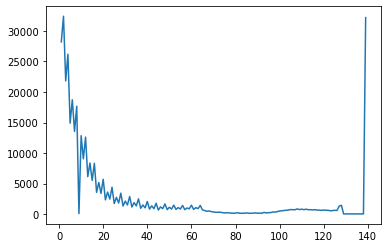

In [61]:
FPGA1 = data[data['FPGA'] == 1] 
FPGA1['TDC_CHANNEL'].value_counts().sort_index(ascending=True).plot()
FPGA1
 

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME REL ns,TIME ABS ns
0,1,0,123,3869200167,2374,26,5.937167e+04,3.446490e+14
1,1,0,124,3869200167,2374,27,5.937250e+04,3.446490e+14
2,1,0,63,3869200167,2553,28,6.384833e+04,3.446490e+14
3,1,0,64,3869200167,2558,19,6.396583e+04,3.446490e+14
4,0,0,64,3869200167,2760,25,6.902083e+04,3.446490e+14
...,...,...,...,...,...,...,...,...
1299993,0,0,61,3869211100,3077,25,9.739339e+08,3.446500e+14
1299999,1,0,63,3869211100,3078,27,9.739339e+08,3.446500e+14
1299996,0,0,49,3869211100,3081,14,9.739340e+08,3.446500e+14
1299997,0,0,139,3869211100,3084,0,9.739341e+08,3.446500e+14


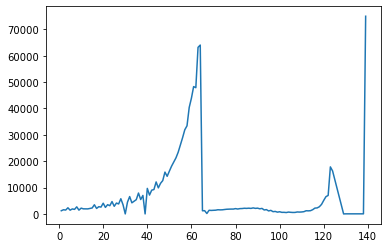

In [60]:
FPGA0 = data[data['FPGA'] == 0]
FPGA0['TDC_CHANNEL'].value_counts().sort_index(ascending=True).plot() #Sort index is fundamental
FPGA0

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [65]:
datag = data.groupby(['TDC_CHANNEL'])['TDC_CHANNEL'].count().sort_values(ascending=False) 
datag.head(3)  #Plot the first 3 raws
    

TDC_CHANNEL
139    107175
64      65483
63      64094
Name: TDC_CHANNEL, dtype: int64

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [80]:
data_orbit = data.groupby(['ORBIT_CNT'])['ORBIT_CNT'].count().sort_values(ascending=False) 

print(data_orbit[data_orbit == 1]) #Show The values for which the number of counts (only column!) = 1

print("Il numero di orbite uniche è: ",len(data_orbit[data_orbit == 1].axes[0]))

ORBIT_CNT
3869206180    1
3869204142    1
Name: ORBIT_CNT, dtype: int64
Il numero di orbite uniche è:  2


In [90]:

data_139 = data[data['TDC_CHANNEL'] == 139] 
data_139
#data_139_m = data_139[data_139['TDC_MEAS'] > 0]

#data_139_m  #Sembra non essercene nessuna

print(data_139['TDC_MEAS'].max())  #Effettivamente la misura massima è 0...

0
